# Proyecto Visualización Ventas en la Industria Logisitica

Integrantes: Edgar Heredia, Alejandro Garcia y Misael Zavala.

Profesora: Tamara Cucumides 


## Acerca de los datos



Para este proyecto trabajaremos con los datos de venta de la empresa de logistica TonyStar, esta empresa participa en el mercado de Corrier a nivel nacional con cobertura de Arica a Punta Areas con una red de 300 sucursales generando más de 1.000.000 de envíos al mes.

La data con la que trabajaremos se encuentra alterada por motivos de seguridad de la compañia y ninguna de los valores es real ademas esta se encuentra agrupada a nivel de regiones.

Contamos son las ventas desde 2018 a 2022 en ordenes de flete (tickets de venta por cliente) y la venta neta siguiente nivel de detalle: 

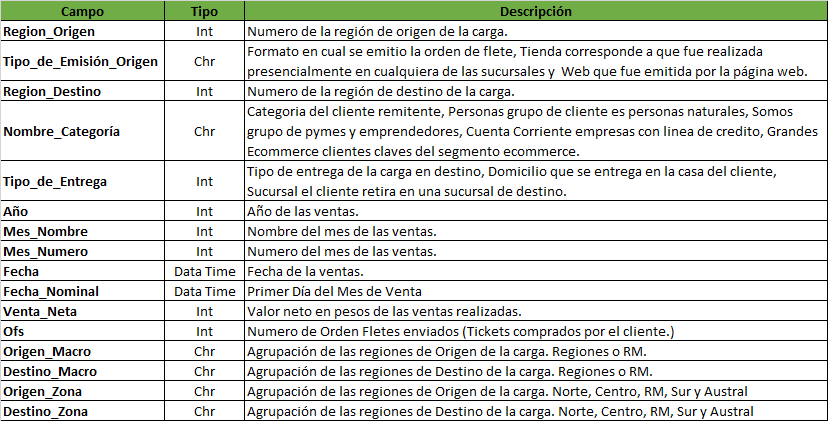

## Objetivo de la Visualizacion

TonyStar se encuentra en un escenario de decrecimiento post pandemia, despues de la exploción de enviós en la industria del courier durante los ultimos 6 meses ha ocurrido un desaceleramiento en todas sus unidades de negocio pero no necesariamiente en todos sus productos Origen - Destino - Tipo de Entrega.

Por lo cual la gerencia comercial necesita un panel que facilite la toma de decisiones para incentivar aquellos puntos que han caido y fortalecer los que no han caido, para garantizar un buen segundo semestre de ventas.




## Tratamiento de los Datos

In [22]:
import altair as alt
import pandas as pd
import numpy as np
from collections import Counter

In [23]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [24]:
df_ventas=pd.read_excel('Dummy UC.xlsx',sheet_name='BDD')
df_ventas

,Region_Origen,Tipo_de_Emision_Origen,Region_Destino,Nombre_Categoria,Tipo_de_Entrega,Ano,Mes_Nombre,Mes_Numero,Fecha,Fecha Nominal,Venta_Neta,Ofs,Origen_Macro,Destino_Macro,Origen_Zona,Destino_Zona
0,13,Tienda,8,Somos,Domicilio,2021,mayo,5,2021-05-01,2021-05-01,115684151,74510,RM,Regiones,RM,Sur
1,13,Tienda,8,Somos,Domicilio,2021,abril,4,2021-04-01,2021-04-01,110301244,71190,RM,Regiones,RM,Sur
2,13,Tienda,13,Somos,Domicilio,2021,mayo,5,2021-05-01,2021-05-01,107728384,95993,RM,RM,RM,RM
3,13,Tienda,5,Somos,Domicilio,2021,mayo,5,2021-05-01,2021-05-01,107239648,78708,RM,Regiones,RM,Centro
4,13,Tienda,13,Somos,Domicilio,2021,abril,4,2021-04-01,2021-04-01,106167863,94978,RM,RM,RM,RM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74289,13,Web,1,Comercio Exterior,Sucursal,2022,abril,4,2022-04-01,2022-04-01,252,1,RM,Regiones,RM,Norte
74290,13,Web,12,Comercio Exterior,Sucursal,2022,marzo,3,2022-03-01,2022-03-01,243,1,RM,Regiones,RM,Austral
74291,13,Web,2,Comercio Exterior,Sucursal,2022,junio,6,2022-06-01,2022-06-01,241,1,RM,Regiones,RM,Norte
74292,13,Web,11,Comercio Exterior,Sucursal,2022,abril,4,2022-04-01,2022-04-01,194,1,RM,Regiones,RM,Austral


In [25]:
### Estado de los Datos

df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74294 entries, 0 to 74293
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Region_Origen           74294 non-null  int64         
 1   Tipo_de_Emision_Origen  74294 non-null  object        
 2   Region_Destino          74294 non-null  int64         
 3   Nombre_Categoria        74294 non-null  object        
 4   Tipo_de_Entrega         74294 non-null  object        
 5   Ano                     74294 non-null  int64         
 6   Mes_Nombre              74294 non-null  object        
 7   Mes_Numero              74294 non-null  int64         
 8   Fecha                   74294 non-null  datetime64[ns]
 9   Fecha Nominal           74294 non-null  datetime64[ns]
 10  Venta_Neta              74294 non-null  int64         
 11  Ofs                     74294 non-null  int64         
 12  Origen_Macro            74294 non-null  object

Como podemos ver los datos vienen bastante limpios para empezar a trabajar en lo que solicita la gerencia.

## Primeras Visualizaciones:

In [26]:
venta_mensual=pd.pivot_table(df_ventas,values=['Venta_Neta','Ofs'],index=['Fecha Nominal','Nombre_Categoria'],aggfunc=np.sum).reset_index()
venta_mensual

,Fecha Nominal,Nombre_Categoria,Ofs,Venta_Neta
0,2018-01-01,Cuenta Corriente,113065,290519110
1,2018-01-01,Grandes Ecommerce,72797,169304640
2,2018-01-01,Persona,281222,620472701
3,2018-01-01,Somos,2156,2317285
4,2018-02-01,Cuenta Corriente,94494,253137917
...,...,...,...,...
224,2022-07-01,Comercio Exterior,130,24692
225,2022-07-01,Cuenta Corriente,5957,15399606
226,2022-07-01,Grandes Ecommerce,2197,7481871
227,2022-07-01,Persona,5931,16236426


Ventas Anuales

In [36]:
venta= alt.Chart(venta_mensual).mark_bar().encode(
    alt.X('yearmonth(Fecha Nominal):N', title='Fecha'),
    alt.Y('Venta_Neta:Q', title='Venta Neta Mensual'), 
).properties(
    width=1000,
    height=500,
    title='Ventas Netas Mensaules 2018 a 2022'
)
venta

alt.Chart(...)

In [37]:
ofs= alt.Chart(venta_mensual).mark_bar().encode(
    alt.X('yearmonth(Fecha Nominal):N', title='Fecha'),
    alt.Y('Ofs:Q', title='Ofs Mensual'), 
).properties(
    width=1000,
    height=500,
    title='Ofs Mensuales 2018 a  2022'
)
ofs

alt.Chart(...)

Venta por Regiones

In [38]:
venta_mensual_ori=pd.pivot_table(df_ventas,values=['Venta_Neta','Ofs'],index=['Fecha Nominal','Origen_Zona'],aggfunc=np.sum).reset_index()
venta_mensual_ori

,Fecha Nominal,Origen_Zona,Ofs,Venta_Neta
0,2018-01-01,Austral,1188,6542146
1,2018-01-01,Centro,54414,90177606
2,2018-01-01,Norte,17344,67927414
3,2018-01-01,RM,362487,852615152
4,2018-01-01,Sur,33807,65351418
...,...,...,...,...
270,2022-07-01,Austral,34,218764
271,2022-07-01,Centro,2977,5503754
272,2022-07-01,Norte,827,3981690
273,2022-07-01,RM,17352,41787607


In [41]:
selection = alt.selection_multi(fields=['Origen_Zona'], bind='legend')

alt.Chart(venta_mensual_ori).mark_area().encode(
    alt.X('yearmonth(Fecha Nominal):N', title='Fecha'),
    alt.Y('sum(Ofs):Q'),
    alt.Color('Origen_Zona:N', title='Zona de Origen'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
).properties(
    width=700,
    height=300,
    title='Ofs por Zona de Origen'
)

alt.Chart(...)